In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn import linear_model

In [2]:
df=pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


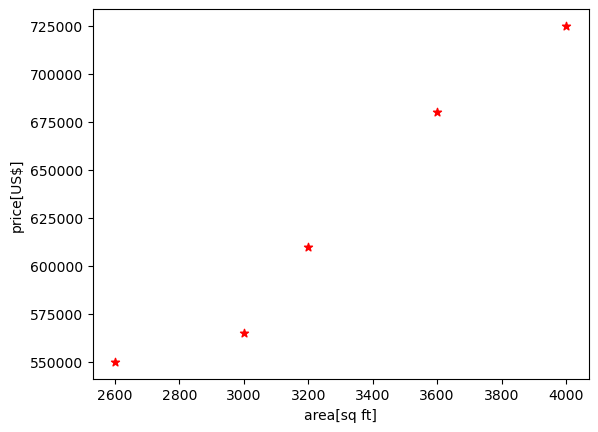

In [6]:
plt.xlabel("area[sq ft]")
plt.ylabel("price[US$]")
plt.scatter(x=df.area,y=df.price,color='red',marker='*')
plt.show()

In [7]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(df[["area"]],df.price)
# here fitting means training the linear regression model using the given/ava data 

LinearRegression()

#### (1) Predict price of a home with area = 3300 sqr ft

In [21]:
reg.predict([[3300]])

C:\Users\SUMIT\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [10]:
# y=mx+b
# slope,Gradient ==> m 
reg.coef_

array([135.78767123])

In [11]:
# intercept ==> b 
reg.intercept_

180616.43835616432

#### Y = m * X + b (m is coefficient and b is intercept)

In [12]:
135.78767123*3300 + 180616.43835616432

628715.7534151643

### Generate CSV file with list of home price predictions

In [13]:
area_df = pd.read_csv("areas.csv")
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [14]:
d = reg.predict(area_df)
d

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [15]:
area_df['prices']=d
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [17]:
area_df.to_csv("prediction.csv",index=False)

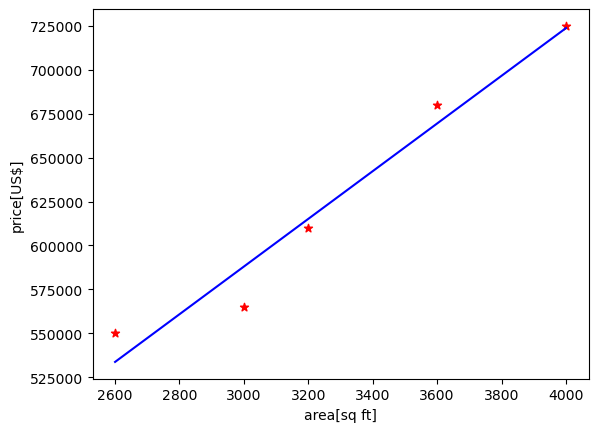

In [20]:
# visual representation of linear equation
plt.xlabel("area[sq ft]")
plt.ylabel("price[US$]")
plt.scatter(x=df.area,y=df.price,color='red',marker='*')
plt.plot(df.area,reg.predict(df[["area"]]),color="blue")
plt.show()